In [276]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from pathlib import Path  
import glob
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline


In [13]:
def clean_data(filename):

    # load data
    file = open(f"./data/{filename}.txt","r+")
    text = file.read()
    file.close()
    
    # split into words
    tokens = word_tokenize(text)
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    punct = [w.translate(table) for w in tokens]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    sw = [w for w in punct if not w in stop_words and len(w)>3]
    
    # remove remaining tokens that are not alphabetic
    alpha = [word for word in sw if word.isalpha()]

    # convert to lower case
    lower = [w.lower() for w in alpha]

    
    
    # determine tags
    tags = pos_tag(lower)
    tg = [t for t in tags]

    filtertg = [w for w,t in tg
              if t == "NN"
              or t == "NNS"
              or t == "NNP"
              or t == "NNPS"
              or t == "FW"]
    
    #lemmatize
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in filtertg]
    
    results = [word for word in lem 
        if word !='project' 
        and word !='gutenbergtm'
        and word !='gutenberg'
        and word !='ebook'
        and word !='chapter'
        and word !='work'
        and word !='nothing'
        and word !='thing'
        and word !='anything'
        and word !='something'
        and word !='time'
        and word !='sidenote']
    
    return results
    
    
    
    

In [14]:
def word_cloud(book):
    clean =  clean_data(book)
    
    unique_string=(" ").join(clean)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

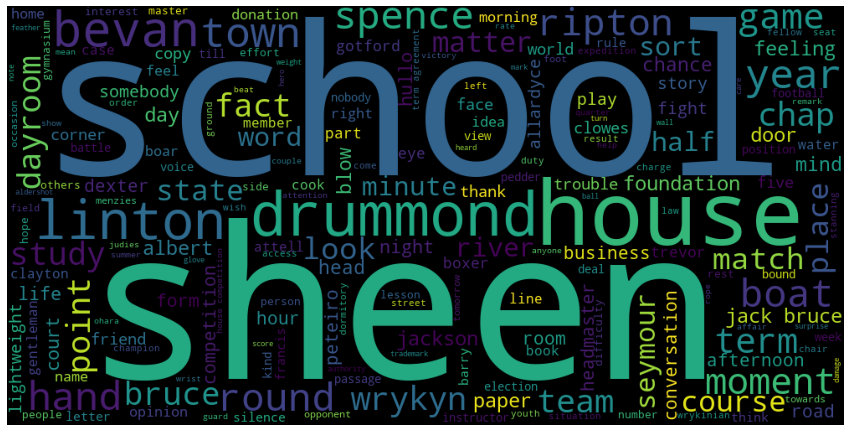

In [15]:
cloud = word_cloud('The White Feather')

In [16]:
def cleantxt(): 

    text_files = glob.glob("/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/data/*.txt")
    text_titles = [Path(text).stem for text in text_files]
    for title in text_titles:
        cleaned = clean_data(title)
        with open(f"{title}.txt",'w',encoding='utf-8') as F:
            for s in cleaned:
                F.write("%s\n" % s)


In [17]:
#a = cleantxt()

In [18]:
directory_path ="/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/"
text_files = glob.glob(f"{directory_path}/*.txt")
text_files = glob.glob("/users/imad/C-DAT-500-PAR-2-1-nlp-imad.bendada/*.txt")
text_titles = [Path(text).stem for text in text_files]

In [378]:
tfidf_vectorizer = TfidfVectorizer(input='filename',min_df = 3, max_df = 3000, stop_words='english')
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names()).T

In [379]:
tfidf_df

,History of Phosphorus,Mother Storie,Little Lord Fauntleroy,alice-in-wonderland,The History of England from the Accession of James II,The Secret Garden,The History Of The Decline And Fall Of The Roman Empire,Histories of two hundred and fifty-one divisions of the German army which participated in the wa,The Last Leaf,The Chemistry of Cookery,...,The Railway Children,Among the Forest People,History of King Charles The First of England,The French Revolution,The Greater Republic,The Magic of Oz,How the Flag Became Old Glory,The Gases of the Atmosphere The History of Their Discovery by William Ramsay,The Princess and the Goblin,The Magic Fishbone
aaron,0.007104,0.0,0.0,0.0,0.00000,0.0,0.000299,0.0,0.003692,0.0,...,0.0,0.0,0.0,0.001815,0.006668,0.0,0.0,0.0,0.0,0.0
abandon,0.000000,0.0,0.0,0.0,0.00000,0.0,0.001187,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.002057,0.001890,0.0,0.0,0.0,0.0,0.0
abandonment,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000201,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
abate,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000848,0.0,0.004186,0.0,...,0.0,0.0,0.0,0.004115,0.000945,0.0,0.0,0.0,0.0,0.0
abates,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000188,0.0,0.004651,0.0,...,0.0,0.0,0.0,0.001143,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoology,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000377,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
zurich,0.000000,0.0,0.0,0.0,0.00148,0.0,0.000603,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
zuyder,0.000000,0.0,0.0,0.0,0.00296,0.0,0.000201,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
æneid,0.000000,0.0,0.0,0.0,0.00148,0.0,0.000603,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [380]:

lsa = TruncatedSVD(n_components=3, n_iter=10, random_state=42)

lsa.fit_transform(tfidf_vector)

V_transpose = lsa.components_.T

In [377]:
# Print the topics with their terms
terms = tfidf_vectorizer.get_feature_names()

for index, component in enumerate(lsa.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['state', 'people', 'year', 'prince', 'house', 'life', 'hand', 'place', 'water', 'mother']
Topic 1:  ['mother', 'prince', 'fairy', 'princess', 'goblin', 'child', 'peter', 'home', 'eye', 'alice']
Topic 2:  ['acid', 'water', 'solution', 'food', 'temperature', 'quantity', 'experiment', 'substance', 'soap', 'gram']


In [337]:
#df = pd.DataFrame(
#lsa.components_,
#index=['Topic 1', 'Topic 2', 'Topic 3'],
#columns=[text_titles]).T
#df




In [335]:
#df2 = df.idxmax(axis=1).T
#df2


In [339]:
# Print the topics with their terms
books = text_titles

for index, component in enumerate(lsa.components_):
    zipped = zip(books, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['The Complete Herbal', 'O Pioneers', 'The United States of America Part I', 'The White Feather', 'History of King Charles The First of England', 'Democracy In America, Volume 1 (of 2)', 'The Progress of Invention in the Nineteenth', 'Mother Storie', 'The Threefold Commonwealth', 'The Elements of Blowpipe Analysis', 'The Railway Children', 'Experiments and Observations on Different', 'The History of England from the Accession of James II', 'The French Revolution', 'The Handbook of Soap Manufacture', 'The Phase Rule and Its Applications', 'How the Flag Became Old Glory', 'Sandman_s Goodnight Stories', 'The Ruins', 'The Gases of the Atmosphere The History of Their Discovery by William Ramsay', 'Narrative and Critical History of America', 'Three Minute Stories', 'War and Peace', 'An Introductory Course of Quantitative Chemical Analysis', 'History of Phosphorus', 'The Tale of Timmy Tiptoes', 'The Natural Food of Man', 'Prince Prigio', 'alice-in-wonderland', 'Histories of two hund